In [1]:
import numpy as np
import pandas as pd

In [2]:
countries_of_interest = ["Estonia", "Czechia", "Slovenia", "Poland", "Hungary", "Slovakia", "Latvia", "Lithuania", "Malta", "North Macedonia", "Cyprus"]

treated_unit = "North Macedonia"
years_pre = list(range(1990, 2004))
years_post = list(range(2004, 2014))
years_all = list(range(1990, 2014))

df_pwt = pd.read_excel("../../data/original/pwt110.xlsx", sheet_name="Data")
df_pwt

countrycode   country   currency_unit  year         rgdpe         rgdpo  \
0             ABW     Aruba  Aruban Guilder  1950           NaN           NaN   
1             ABW     Aruba  Aruban Guilder  1951           NaN           NaN   
2             ABW     Aruba  Aruban Guilder  1952           NaN           NaN   
3             ABW     Aruba  Aruban Guilder  1953           NaN           NaN   
4             ABW     Aruba  Aruban Guilder  1954           NaN           NaN   
...           ...       ...             ...   ...           ...           ...   
13685         ZWE  Zimbabwe       US Dollar  2019  46541.140625  45106.468750   
13686         ZWE  Zimbabwe       US Dollar  2020  45985.085938  45983.898438   
13687         ZWE  Zimbabwe       US Dollar  2021  45625.347656  44440.199219   
13688         ZWE  Zimbabwe       US Dollar  2022  50148.527344  48054.238281   
13689         ZWE  Zimbabwe       US Dollar  2023  52258.898438  50540.847656   

             pop       emp      avh        hc  ...     csh_x     csh_m  \
0            NaN       NaN      NaN       NaN  ...       NaN       NaN   
1            NaN       NaN      NaN       NaN  ...       NaN       NaN   
2            NaN       NaN      NaN       NaN  ...       NaN       NaN   
3            NaN       NaN      NaN       NaN  ...       NaN       NaN   
4            NaN       NaN      NaN       NaN  ...       NaN       NaN   
...          ...       ...      ...       ...  ...       ...       ...   
13685  15.271368  5.272343  1903.71  2.713408  ...  0.189066 -0.242234   
13686  15.526888  5.206007  1889.45  2.746586  ...  0.110438 -0.165574   
13687  15.797210  5.298346  2011.57  2.770661  ...  0.172298 -0.279770   
13688  16.069056  5.344455  2172.04  2.795292  ...  0.220504 -0.391468   
13689  16.340822  5.504774  2311.02  2.820498  ...  0.179567 -0.308382   

          csh_r      pl_c      pl_i      pl_g      pl_x      pl_m      pl_n  \
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
13685  0.038880  0.501244  0.534841  0.345942  0.505318  0.441230  0.339268   
13686  0.029654  0.500685  0.519637  0.290690  0.772591  0.680202  0.324105   
13687  0.024442  0.616105  0.549380  0.301370  0.558099  0.497615  0.347739   
13688  0.021712  0.660731  0.478931  0.280778  0.487665  0.432867  0.301817   
13689  0.015704  0.736836  0.507688  0.307323  0.505070  0.474047  0.308811   

           pl_k  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
13685  1.346716  
13686  1.353769  
13687  1.064607  
13688  1.006796  
13689  1.030187  

[13690 rows x 51 columns]

In [3]:
need_cols = ["country", "year", "csh_x", "csh_m", "csh_i", "pop", "rgdpe", "emp"]
df_pwt = df_pwt[df_pwt["country"].isin(countries_of_interest)]
df_pwt = df_pwt[df_pwt["year"].isin(years_all)]
df_pwt["trade_openness"] = df_pwt["csh_x"] + df_pwt["csh_m"]

df_pwt = df_pwt[(df_pwt["pop"]>0) & (df_pwt["emp"]>0)]
df_pwt["gdp_pc"] = df_pwt["rgdpe"] / df_pwt["pop"]
df_pwt["gdp_emp"] = df_pwt["rgdpe"] / df_pwt["emp"]
df_pwt["log_gdp_pc"] = np.log(df_pwt["gdp_pc"].astype(float))
df_pwt["log_gdp_emp"] = np.log(df_pwt["gdp_emp"].astype(float))

Y = df_pwt.pivot(index="country", columns="year", values="log_gdp_pc").reindex(index=countries_of_interest, columns=years_all)

df_pwt

countrycode   country currency_unit  year         rgdpe         rgdpo  \
3296          CYP    Cyprus          Euro  1990  14429.541016  14440.776367   
3297          CYP    Cyprus          Euro  1991  14358.906250  14176.858398   
3298          CYP    Cyprus          Euro  1992  15865.638672  15076.755859   
3299          CYP    Cyprus          Euro  1993  15730.431641  14998.380859   
3300          CYP    Cyprus          Euro  1994  16889.529297  15806.750977   
...           ...       ...           ...   ...           ...           ...   
11529         SVN  Slovenia          Euro  2009  69089.070312  65633.859375   
11530         SVN  Slovenia          Euro  2010  69207.945312  66438.625000   
11531         SVN  Slovenia          Euro  2011  72155.351562  70125.164062   
11532         SVN  Slovenia          Euro  2012  71059.703125  69244.335938   
11533         SVN  Slovenia          Euro  2013  70865.601562  67684.718750   

            pop       emp      avh        hc  ...      pl_g      pl_x  \
3296   0.579400  0.226938      NaN  2.306047  ...  0.431437  0.435067   
3297   0.594900  0.227446      NaN  2.329377  ...  0.455735  0.471842   
3298   0.610600  0.236539      NaN  2.352943  ...  0.491863  0.429895   
3299   0.625800  0.236057      NaN  2.376748  ...  0.486776  0.444996   
3300   0.639000  0.239755      NaN  2.400794  ...  0.521588  0.430210   
...         ...       ...      ...       ...  ...       ...       ...   
11529  2.035608  0.974279  1679.01  3.372191  ...  0.750296  0.583173   
11530  2.044612  0.954647  1680.33  3.391089  ...  0.723200  0.593579   
11531  2.048804  0.938706  1663.36  3.426072  ...  0.714813  0.624593   
11532  2.053321  0.930393  1644.37  3.442520  ...  0.657619  0.608143   
11533  2.056441  0.920079  1662.29  3.466155  ...  0.672319  0.631602   

           pl_m      pl_n      pl_k  trade_openness        gdp_pc  \
3296   0.421247  0.320105  0.851847       -0.268717  24904.282043   
3297   0.456301  0.334587  0.838688       -0.254098  24136.672130   
3298   0.413892  0.362056  0.927564       -0.374376  25983.686000   
3299   0.398875  0.343945  0.826470       -0.296280  25136.515885   
3300   0.415360  0.361407  0.875527       -0.316746  26431.188258   
...         ...       ...       ...             ...           ...   
11529  0.524886  0.566620  0.650210       -0.112571  33940.262719   
11530  0.535551  0.513727  0.536556       -0.134662  33848.938240   
11531  0.562056  0.529326  0.555088       -0.139972  35218.279329   
11532  0.539892  0.454780  0.463931       -0.125241  34607.206143   
11533  0.555196  0.416091  0.443232       -0.120074  34460.313504   

            gdp_emp  log_gdp_pc  log_gdp_emp  
3296   63583.515288   10.122795    11.060110  
3297   63131.046793   10.091488    11.052968  
3298   67074.056532   10.165224    11.113553  
3299   66638.361111   10.132077    11.107036  
3300   70445.085653   10.182300    11.162589  
...             ...         ...          ...  
11529  70913.046886   10.432357    11.169210  
11530  72495.844702   10.429663    11.191285  
11531  76866.823541   10.469321    11.249830  
11532  76376.033967   10.451817    11.243424  
11533  77021.224585   10.447564    11.251836  

[264 rows x 56 columns]

In [4]:
def build_pwt_predictors(df, pre_years):
    d = df[df["year"].isin(pre_years)].copy()
    d = d.sort_values(["country", "year"])

    X = pd.DataFrame(index=d["country"].unique())

    gdp = d.pivot(index="country", columns="year", values="log_gdp_pc")
    gdp_emp = d.pivot(index="country", columns="year", values="log_gdp_emp")
    print(gdp_emp)

    # block1 = [y for y in pre_years if y <= 1996]
    # block2 = [y for y in pre_years if y >= 1997 and y <=1998]
    # block3 = [y for y in pre_years if y <= 2001 and y >=1999]
    # block4 = [y for y in pre_years if y >= 2002]
    #
    #
    # X["gdp_block_1995_1997"] = gdp[block1].mean(axis=1)
    # X["gdp_block_1997_1998"] = gdp[block2].mean(axis=1)
    # X["gdp_block_1999_2001"] = gdp[block3].mean(axis=1)
    # X["gdp_block_2002_2003"] = gdp[block4].mean(axis=1)

    yrs = [y for y in pre_years if y in gdp.columns]
    X[yrs] = gdp[yrs]
    X["inv_pre_avg"] = d.groupby("country")["csh_i"].mean()

    pop = d.pivot(index="country", columns="year", values="pop").astype(float)
    pop_growth = np.log(pop).diff(axis=1)
    X["pop_growth_pre_avg"] = pop_growth.mean(axis=1)
    X["gdp_emp"] = gdp_emp.mean(axis=1)
    X["trade_open_pre_avg"] = d.groupby("country")["trade_openness"].mean()

    return X.astype(float)


X_pre = build_pwt_predictors(df_pwt, years_pre).reindex(countries_of_interest)
if X_pre.isna().any().any():
    print("Missing predictor values after transformations. Ensure PWT has pop/hc/etc or remove those predictors.")


donors = [c for c in countries_of_interest if (c != treated_unit)]
X0 = X_pre.loc[donors].copy()
X1 = X_pre.loc[[treated_unit]].copy()

Y0 = Y.loc[donors, :].copy()
Y1 = Y.loc[treated_unit, :].copy()

year                  1990       1991       1992       1993       1994  \
country                                                                  
Cyprus           11.060110  11.052968  11.113553  11.107036  11.162589   
Czechia          10.868112  10.717602  10.721935  10.748378  10.777100   
Estonia          10.086251  10.206875   9.972624  10.012450  10.015609   
Hungary          10.367196  10.311763  10.414595  10.526752  10.617878   
Latvia           10.566833  10.477918  10.207156  10.206473  10.174193   
Lithuania        10.469242  10.324943  10.162797  10.023200  10.038167   
Malta            10.824362  10.866540  10.878146  10.907553  10.956202   
North Macedonia   9.538031   9.587162   9.575008   9.638998   9.737845   
Poland           10.128102  10.131908  10.203033  10.293659  10.353417   
Slovakia         10.746567  10.597665  10.596843  10.598968  10.670502   
Slovenia         10.652961  10.603297  10.604465  10.697866  10.790191   

year                  1995       1996

In [5]:
X_pre

1990       1991       1992       1993       1994  \
Estonia           9.450243   9.548294   9.272572   9.254324   9.239572   
Czechia          10.221043  10.045134  10.009009  10.031498  10.070522   
Slovenia         10.078172   9.944231   9.888710   9.951469  10.018324   
Poland            9.247028   9.188399   9.248313   9.313796   9.382777   
Hungary           9.653985   9.543291   9.558963   9.606135   9.664294   
Slovakia          9.977013   9.747554   9.676194   9.674915   9.723345   
Latvia            9.813377   9.720634   9.387847   9.335420   9.214463   
Lithuania         9.695899   9.560455   9.389029   9.224064   9.188631   
Malta             9.803256   9.860754   9.872943   9.895898   9.946557   
North Macedonia   8.804752   8.820597   8.749798   8.742593   8.778749   
Cyprus           10.122795  10.091488  10.165224  10.132077  10.182300   

                      1995       1996       1997       1998       1999  \
Estonia           9.346914   9.410125   9.490567   9.530566   9.547180   
Czechia          10.109442  10.158427  10.137001  10.132394  10.126518   
Slovenia         10.078388  10.114527  10.142149  10.157270  10.190753   
Poland            9.468996   9.533924   9.591169   9.643573   9.692532   
Hungary           9.705914   9.736618   9.767668   9.794362   9.826489   
Slovakia          9.770674   9.780299   9.798920   9.792322   9.755731   
Latvia            9.182641   9.180361   9.241958   9.333489   9.400878   
Lithuania         9.234084   9.304795   9.389514   9.460281   9.489978   
Malta             9.989033   9.986947  10.078988  10.134796  10.202193   
North Macedonia   8.817635   8.824234   8.841588   8.886534   8.975384   
Cyprus           10.233092  10.225826  10.232919  10.277751  10.322633   

                      2000       2001       2002       2003  inv_pre_avg  \
Estonia           9.625133   9.680295   9.752738   9.813584     0.190092   
Czechia          10.143266  10.197310  10.204579  10.230612     0.228739   
Slovenia         10.207356  10.231784  10.259950  10.270389     0.245997   
Poland            9.715552   9.738641   9.766630   9.762206     0.169874   
Hungary           9.867778   9.969057  10.022071  10.024088     0.178190   
Slovakia          9.791108   9.836713   9.876972   9.903451     0.204089   
Latvia            9.440762   9.509520   9.591175   9.621104     0.162314   
Lithuania         9.552448   9.630032   9.699815   9.784824     0.124489   
Malta            10.248412  10.236680  10.264316  10.265717     0.276310   
North Macedonia   9.042292   9.080018   9.082963   9.118992     0.131625   
Cyprus           10.379443  10.425616  10.426292  10.409837     0.305659   

                 pop_growth_pre_avg    gdp_emp  trade_open_pre_avg  
Estonia                   -0.010449  10.291067           -0.061195  
Czechia                   -0.000397  10.841029           -0.017095  
Slovenia                  -0.000213  10.864031           -0.061300  
Poland                     0.000299  10.481018           -0.039700  
Hungary                   -0.002045  10.667756           -0.033176  
Slovakia                   0.001592  10.715093           -0.042679  
Latvia                    -0.011559  10.315256           -0.059690  
Lithuania                 -0.006056  10.307678           -0.051393  
Malta                      0.007999  11.021330           -0.308245  
North Macedonia            0.000658   9.960646           -0.068854  
Cyprus                     0.016481  11.220185           -0.331836

In [6]:
gdp = df_pwt.pivot(index="country", columns="year", values="log_gdp_pc")
block1 = [y for y in years_pre if y <= 1996]
gdp[block1].mean(axis=1)

country
Cyprus             10.164686
Czechia            10.092153
Estonia             9.360292
Hungary             9.638457
Latvia              9.404963
Lithuania           9.370994
Malta               9.907912
North Macedonia     8.791194
Poland              9.340462
Slovakia            9.764285
Slovenia           10.010546
dtype: float64

In [7]:
X_pre

1990       1991       1992       1993       1994  \
Estonia           9.450243   9.548294   9.272572   9.254324   9.239572   
Czechia          10.221043  10.045134  10.009009  10.031498  10.070522   
Slovenia         10.078172   9.944231   9.888710   9.951469  10.018324   
Poland            9.247028   9.188399   9.248313   9.313796   9.382777   
Hungary           9.653985   9.543291   9.558963   9.606135   9.664294   
Slovakia          9.977013   9.747554   9.676194   9.674915   9.723345   
Latvia            9.813377   9.720634   9.387847   9.335420   9.214463   
Lithuania         9.695899   9.560455   9.389029   9.224064   9.188631   
Malta             9.803256   9.860754   9.872943   9.895898   9.946557   
North Macedonia   8.804752   8.820597   8.749798   8.742593   8.778749   
Cyprus           10.122795  10.091488  10.165224  10.132077  10.182300   

                      1995       1996       1997       1998       1999  \
Estonia           9.346914   9.410125   9.490567   9.530566   9.547180   
Czechia          10.109442  10.158427  10.137001  10.132394  10.126518   
Slovenia         10.078388  10.114527  10.142149  10.157270  10.190753   
Poland            9.468996   9.533924   9.591169   9.643573   9.692532   
Hungary           9.705914   9.736618   9.767668   9.794362   9.826489   
Slovakia          9.770674   9.780299   9.798920   9.792322   9.755731   
Latvia            9.182641   9.180361   9.241958   9.333489   9.400878   
Lithuania         9.234084   9.304795   9.389514   9.460281   9.489978   
Malta             9.989033   9.986947  10.078988  10.134796  10.202193   
North Macedonia   8.817635   8.824234   8.841588   8.886534   8.975384   
Cyprus           10.233092  10.225826  10.232919  10.277751  10.322633   

                      2000       2001       2002       2003  inv_pre_avg  \
Estonia           9.625133   9.680295   9.752738   9.813584     0.190092   
Czechia          10.143266  10.197310  10.204579  10.230612     0.228739   
Slovenia         10.207356  10.231784  10.259950  10.270389     0.245997   
Poland            9.715552   9.738641   9.766630   9.762206     0.169874   
Hungary           9.867778   9.969057  10.022071  10.024088     0.178190   
Slovakia          9.791108   9.836713   9.876972   9.903451     0.204089   
Latvia            9.440762   9.509520   9.591175   9.621104     0.162314   
Lithuania         9.552448   9.630032   9.699815   9.784824     0.124489   
Malta            10.248412  10.236680  10.264316  10.265717     0.276310   
North Macedonia   9.042292   9.080018   9.082963   9.118992     0.131625   
Cyprus           10.379443  10.425616  10.426292  10.409837     0.305659   

                 pop_growth_pre_avg    gdp_emp  trade_open_pre_avg  
Estonia                   -0.010449  10.291067           -0.061195  
Czechia                   -0.000397  10.841029           -0.017095  
Slovenia                  -0.000213  10.864031           -0.061300  
Poland                     0.000299  10.481018           -0.039700  
Hungary                   -0.002045  10.667756           -0.033176  
Slovakia                   0.001592  10.715093           -0.042679  
Latvia                    -0.011559  10.315256           -0.059690  
Lithuania                 -0.006056  10.307678           -0.051393  
Malta                      0.007999  11.021330           -0.308245  
North Macedonia            0.000658   9.960646           -0.068854  
Cyprus                     0.016481  11.220185           -0.331836

In [8]:
Y

year                  1990       1991       1992       1993       1994  \
country                                                                  
Estonia           9.450243   9.548294   9.272572   9.254324   9.239572   
Czechia          10.221043  10.045134  10.009009  10.031498  10.070522   
Slovenia         10.078172   9.944231   9.888710   9.951469  10.018324   
Poland            9.247028   9.188399   9.248313   9.313796   9.382777   
Hungary           9.653985   9.543291   9.558963   9.606135   9.664294   
Slovakia          9.977013   9.747554   9.676194   9.674915   9.723345   
Latvia            9.813377   9.720634   9.387847   9.335420   9.214463   
Lithuania         9.695899   9.560455   9.389029   9.224064   9.188631   
Malta             9.803256   9.860754   9.872943   9.895898   9.946557   
North Macedonia   8.804752   8.820597   8.749798   8.742593   8.778749   
Cyprus           10.122795  10.091488  10.165224  10.132077  10.182300   

year                  1995       1996       1997       1998       1999  ...  \
country                                                                 ...   
Estonia           9.346914   9.410125   9.490567   9.530566   9.547180  ...   
Czechia          10.109442  10.158427  10.137001  10.132394  10.126518  ...   
Slovenia         10.078388  10.114527  10.142149  10.157270  10.190753  ...   
Poland            9.468996   9.533924   9.591169   9.643573   9.692532  ...   
Hungary           9.705914   9.736618   9.767668   9.794362   9.826489  ...   
Slovakia          9.770674   9.780299   9.798920   9.792322   9.755731  ...   
Latvia            9.182641   9.180361   9.241958   9.333489   9.400878  ...   
Lithuania         9.234084   9.304795   9.389514   9.460281   9.489978  ...   
Malta             9.989033   9.986947  10.078988  10.134796  10.202193  ...   
North Macedonia   8.817635   8.824234   8.841588   8.886534   8.975384  ...   
Cyprus           10.233092  10.225826  10.232919  10.277751  10.322633  ...   

year                  2004       2005       2006       2007       2008  \
country                                                                  
Estonia           9.899810   9.986441  10.098139  10.232280  10.240748   
Czechia          10.276812  10.296494  10.350944  10.440239  10.433956   
Slovenia         10.333513  10.352835  10.400226  10.466548  10.507935   
Poland            9.817526   9.832761   9.891046   9.988113  10.029182   
Hungary          10.046431  10.056519  10.102285  10.136623  10.178587   
Slovakia          9.946555  10.002119  10.100526  10.234610  10.308962   
Latvia            9.685957   9.765973   9.876540  10.023570  10.060663   
Lithuania         9.832699   9.886811   9.971328  10.101074  10.153612   
Malta            10.267425  10.265309  10.283561  10.341138  10.393983   
North Macedonia   9.146509   9.224416   9.277983   9.363381   9.439426   
Cyprus           10.467354  10.499429  10.554220  10.608028  10.679288   

year                  2009       2010       2011       2012       2013  
country                                                                 
Estonia          10.136683  10.179318  10.330326  10.385041  10.391926  
Czechia          10.435159  10.441309  10.489890  10.489289  10.488907  
Slovenia         10.432357  10.429663  10.469321  10.451817  10.447564  
Poland           10.094763  10.154509  10.240611  10.262961  10.255948  
Hungary          10.189322  10.225649  10.252353  10.252528  10.265059  
Slovakia         10.287549  10.343778  10.387038  10.407506  10.384681  
Latvia            9.949763   9.975633  10.059247  10.122967  10.140596  
Lithuania        10.036884  10.108789  10.247866  10.320229  10.346541  
Malta            10.419185  10.482328  10.471720  10.514890  10.539661  
North Macedonia   9.504077   9.537757   9.540638   9.567253   9.592125  
Cyprus           10.660506  10.658559  10.585099  10.547573  10.433063  

[11 rows x 24 columns]

In [9]:
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

def scm_weights_path_with_intercept(Y0_path, y1_path):
    Y0_path = np.asarray(Y0_path, float)
    y1_path = np.asarray(y1_path, float).ravel()
    N0, T0 = Y0_path.shape

    def obj(w):
        syn = Y0_path.T @ w
        d = y1_path - syn
        return float(d @ d)

    cons = [{"type": "eq", "fun": lambda w: np.sum(w) - 1.0}]
    bnds = [(0.0, 1.0) for _ in range(N0)]
    w0 = np.ones(N0) / N0

    res = minimize(
        obj, w0, method="SLSQP",
        bounds=bnds, constraints=cons,
        options={"maxiter": 20000, "ftol": 1e-12}
    )
    if not res.success:
        raise RuntimeError(f"SCM optimization failed: {res.message}")

    w = res.x
    a = float(np.mean(y1_path - (Y0_path.T @ w)))
    return w, a


def fit_ascm_panel(Y0, Y1, X0, X1, years_pre, years_post, alphas=None):
    if alphas is None:
        alphas = np.logspace(-4, 4, 60)

    if isinstance(Y1, pd.DataFrame):
        if Y1.shape[0] != 1:
            raise ValueError("Y1 must be a Series or a single-row DataFrame.")
        y1_all = Y1.iloc[0]
    else:
        y1_all = Y1

    years_all = list(years_pre) + list(years_post)

    Y0_all = Y0[years_all].values.astype(float)
    y1_all_vec = y1_all[years_all].values.astype(float)

    T0 = len(years_pre)
    T1 = len(years_post)

    scaler = StandardScaler()
    X0s = scaler.fit_transform(X0.values.astype(float))
    X1s = scaler.transform(X1.values.astype(float))[0]

    ridge_models = {}
    m0 = np.empty((Y0_all.shape[0], len(years_all)), dtype=float)
    m1 = np.empty((len(years_all),), dtype=float)

    for j, t in enumerate(years_all):
        yt0 = Y0_all[:, j]
        cv = min(5, X0.shape[0])
        model = RidgeCV(alphas=alphas, fit_intercept=True, cv=cv)
        model.fit(X0s, yt0)
        ridge_models[t] = model

        m0[:, j] = model.predict(X0s)
        m1[j] = model.predict(X1s.reshape(1, -1))[0]

    R0_all = Y0_all - m0
    r1_all = y1_all_vec - m1

    R0_pre = R0_all[:, :T0]
    r1_pre = r1_all[:T0]
    w, a_resid = scm_weights_path_with_intercept(R0_pre, r1_pre)

    Y0_pre = Y0_all[:, :T0]
    Y0_post = Y0_all[:, T0:]
    syn_pre = Y0_pre.T @ w
    syn_post = Y0_post.T @ w

    m0_pre = m0[:, :T0]
    m0_post = m0[:, T0:]
    adj_pre = m1[:T0] - (m0_pre.T @ w)
    adj_post = m1[T0:] - (m0_post.T @ w)

    ascm_pre = syn_pre + adj_pre
    ascm_post = syn_post + adj_post

    # ascm_pre = syn_pre + adj_pre + a_resid
    # ascm_post = syn_post + adj_post + a_resid

    y1_pre = y1_all_vec[:T0]
    y1_post = y1_all_vec[T0:]

    out = {
        "w": pd.Series(w, index=X0.index, name="unit_weight"),
        "scaler": scaler,
        "ridge_models": ridge_models,

        "syn_pre": pd.Series(syn_pre, index=years_pre, name="scm_syn_pre"),
        "syn_post": pd.Series(syn_post, index=years_post, name="scm_syn_post"),

        "ascm_pre": pd.Series(ascm_pre, index=years_pre, name="ascm_cf_pre"),
        "ascm_post": pd.Series(ascm_post, index=years_post, name="ascm_cf_post"),

        "y1_pre": pd.Series(y1_pre, index=years_pre, name="treated_pre"),
        "y1_post": pd.Series(y1_post, index=years_post, name="treated_post"),

        "gap_post_scm": pd.Series(y1_post - syn_post, index=years_post, name="gap_post_scm"),
        "gap_post_ascm": pd.Series(y1_post - ascm_post, index=years_post, name="gap_post_ascm"),

        "att_post_avg_scm": float(np.mean(y1_post - syn_post)),
        "att_post_avg_ascm": float(np.mean(y1_post - ascm_post)),

        "resid_intercept": float(a_resid),
    }
    return out

In [10]:
res = fit_ascm_panel(Y0, Y1, X0, X1, years_pre, years_post)
res

{'w': Estonia      5.083239e-01
 Czechia      0.000000e+00
 Slovenia     1.980014e-17
 Poland       2.064903e-01
 Hungary      1.694360e-16
 Slovakia     0.000000e+00
 Latvia       2.851858e-01
 Lithuania    1.862255e-17
 Malta        0.000000e+00
 Cyprus       3.482957e-17
 Name: unit_weight, dtype: float64,
 'scaler': StandardScaler(),
 'ridge_models': {1990: RidgeCV(alphas=array([1.00000000e-04, 1.36644835e-04, 1.86718109e-04, 2.55140652e-04,
         3.48636523e-04, 4.76393801e-04, 6.50967523e-04, 8.89513497e-04,
         1.21547425e-03, 1.66088278e-03, 2.26951054e-03, 3.10116893e-03,
         4.23758716e-03, 5.79044398e-03, 7.91234262e-03, 1.08118075e-02,
         1.47737765e-02, 2.01876025e-02, 2.75853162e-02, 3.76939098e-02,
         5.15067808e-02, 7.03813555e-0...
         7.60949669e+00, 1.03979842e+01, 1.42083083e+01, 1.94149195e+01,
         2.65294846e+01, 3.62511705e+01, 4.95353521e+01, 6.76875001e+01,
         9.24914728e+01, 1.26384820e+02, 1.72698329e+02, 2.35983347e+0

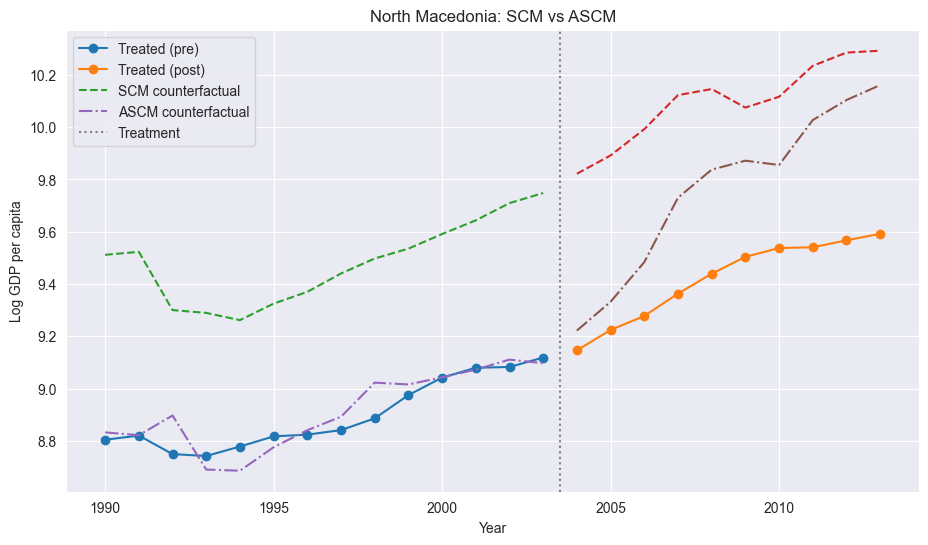

In [11]:
import matplotlib.pyplot as plt

def plot_scm_ascm(res, years_pre, years_post, treat_year=None, title="SCM vs ASCM"):
    y_pre  = res["y1_pre"]
    y_post = res["y1_post"]

    syn_pre  = res["syn_pre"]
    syn_post = res["syn_post"]

    ascm_pre  = res["ascm_pre"]
    ascm_post = res["ascm_post"]

    plt.figure(figsize=(11,6))
    plt.plot(y_pre.index,  y_pre.values,  marker="o", label="Treated (pre)")
    plt.plot(y_post.index, y_post.values, marker="o", label="Treated (post)")

    plt.plot(syn_pre.index,  syn_pre.values,  linestyle="--", label="SCM counterfactual")
    plt.plot(syn_post.index, syn_post.values, linestyle="--")

    plt.plot(ascm_pre.index,  ascm_pre.values,  linestyle="-.", label="ASCM counterfactual")
    plt.plot(ascm_post.index, ascm_post.values, linestyle="-.")

    if treat_year is None:
        treat_year = max(years_pre)
    plt.axvline(x=treat_year + 0.5, linestyle=":", color="grey", label="Treatment")

    plt.xlabel("Year")
    plt.ylabel("Log GDP per capita")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_scm_ascm(res, years_pre, years_post, treat_year=max(years_pre), title="North Macedonia: SCM vs ASCM")


spec                                             baseline
att_post_avg                                    -0.343068
att_2004_2008                                   -0.230832
att_2009_2013                                   -0.455304
pre_rmse_gap                                     0.065499
top_donors       Estonia, Latvia, Poland, Hungary, Cyprus
top_weights             0.508, 0.285, 0.206, 0.000, 0.000
dtype: object


/Users/miloshkirovski/PycharmProjects/reform-pathway-analysis/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/miloshkirovski/PycharmProjects/reform-pathway-analysis/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/miloshkirovski/PycharmProjects/reform-pathway-analysis/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/miloshkirovski/PycharmProjects/reform-pathway-analysis/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
 

     dropped  n_donors  att_2004_2008  att_2009_2013  att_post_avg  \
3     Poland         9      -0.225554      -0.595335     -0.410445   
6     Latvia         9      -0.243083      -0.574633     -0.408858   
9     Cyprus         9      -0.103449      -0.518120     -0.310784   
7  Lithuania         9      -0.237294      -0.504876     -0.371085   
8      Malta         9      -0.123741      -0.491140     -0.307441   
5   Slovakia         9      -0.217561      -0.422749     -0.320155   
1    Czechia         9      -0.240845      -0.418241     -0.329543   
4    Hungary         9      -0.215347      -0.411221     -0.313284   
2   Slovenia         9      -0.293879      -0.360814     -0.327346   
0    Estonia         9      -0.146991      -0.343734     -0.245362   

   pre_rmse_gap                                    top_donors  \
3      0.074577    Malta, Latvia, Hungary, Lithuania, Czechia   
6      0.050157    Hungary, Malta, Slovakia, Estonia, Czechia   
9      0.044185     Hungary, Latvi

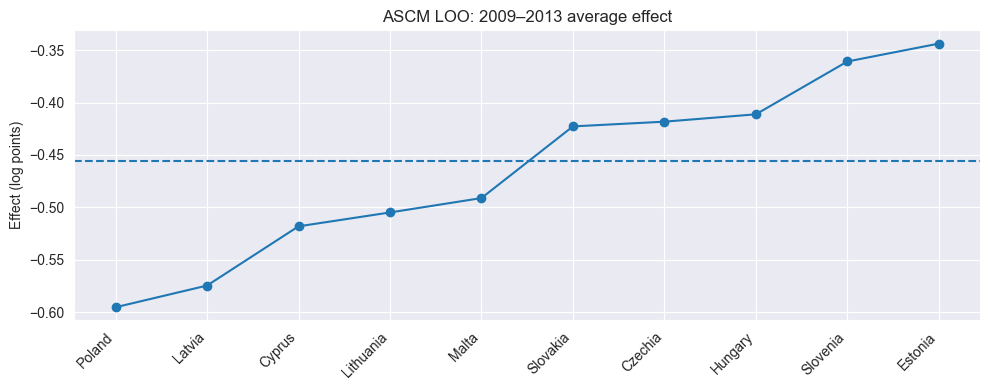

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BLOCK1 = list(range(2004, 2009))
BLOCK2 = list(range(2009, 2014))

def summarize(res, label):
    gap_pre  = res["y1_pre"]  - res["ascm_pre"]
    gap_post = res["y1_post"] - res["ascm_post"]

    att_post_avg = float(gap_post.mean())
    att_0408 = float(gap_post.loc[[y for y in BLOCK1 if y in gap_post.index]].mean())
    att_0913 = float(gap_post.loc[[y for y in BLOCK2 if y in gap_post.index]].mean())
    pre_rmse = float(np.sqrt(np.mean(gap_pre.values**2)))

    w_sorted = res["w"].sort_values(ascending=False)
    top_donors = ", ".join(w_sorted.head(5).index.tolist())
    top_weights = ", ".join([f"{v:.3f}" for v in w_sorted.head(5).values])

    return {
        "spec": label,
        "att_post_avg": att_post_avg,
        "att_2004_2008": att_0408,
        "att_2009_2013": att_0913,
        "pre_rmse_gap": pre_rmse,
        "top_donors": top_donors,
        "top_weights": top_weights,
    }

def fit_with_donors(donor_list, alphas=None):
    X0_sub = X_pre.loc[donor_list]
    Y0_sub = Y.loc[donor_list, :]
    return fit_ascm_panel(Y0_sub, Y1, X0_sub, X1, years_pre, years_post, alphas=alphas)

baseline = fit_ascm_panel(Y0, Y1, X0, X1, years_pre, years_post)
baseline_sum = summarize(baseline, "baseline")
print(pd.Series(baseline_sum))

rows = []
for d in donors:
    keep = [x for x in donors if x != d]
    res = fit_with_donors(keep)
    s = summarize(res, f"drop_{d}")
    s["dropped"] = d
    s["n_donors"] = len(keep)
    rows.append(s)

loo_df = pd.DataFrame(rows).sort_values("att_2009_2013")
print(loo_df[["dropped","n_donors","att_2004_2008","att_2009_2013","att_post_avg","pre_rmse_gap","top_donors","top_weights"]])

plt.figure(figsize=(10,4))
plt.axhline(baseline_sum["att_2009_2013"], linestyle="--")
plt.plot(loo_df["dropped"], loo_df["att_2009_2013"], marker="o")
plt.xticks(rotation=45, ha="right")
plt.title("ASCM LOO: 2009–2013 average effect")
plt.ylabel("Effect (log points)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import pandas as pd

BLOCK1 = list(range(2004, 2009))
BLOCK2 = list(range(2009, 2014))

def _block_mean(s: pd.Series, yrs):
    yrs = [y for y in yrs if y in s.index]
    return float(s.loc[yrs].mean()) if yrs else np.nan

def _rmse(x: np.ndarray) -> float:
    return float(np.sqrt(np.mean(np.asarray(x, float) ** 2)))

def run_ascm_for_treated(treated, donor_list, alphas=None):
    Y1_u = Y.loc[treated, :].copy()
    X1_u = X_pre.loc[[treated]].copy()
    Y0_u = Y.loc[donor_list, :].copy()
    X0_u = X_pre.loc[donor_list].copy()
    return fit_ascm_panel(Y0_u, Y1_u, X0_u, X1_u, years_pre, years_post, alphas=alphas)

def summarize_ascm(res, treated_label):
    gap_pre  = res["y1_pre"]  - res["ascm_pre"]
    gap_post = res["y1_post"] - res["ascm_post"]

    att_post = float(gap_post.mean())
    att_0408 = _block_mean(gap_post, BLOCK1)
    att_0913 = _block_mean(gap_post, BLOCK2)

    pre_rmse = _rmse(gap_pre.values)
    post_rmse = _rmse(gap_post.values)
    rmspe_ratio = post_rmse / pre_rmse if pre_rmse > 0 else np.inf

    w_sorted = res["w"].sort_values(ascending=False)

    return {
        "treated": treated_label,
        "att_post_avg": att_post,
        "att_2004_2008": att_0408,
        "att_2009_2013": att_0913,
        "pre_rmse": pre_rmse,
        "post_rmse": post_rmse,
        "rmspe_ratio": rmspe_ratio,
        "top_donors": ", ".join(w_sorted.head(5).index.tolist()),
        "top_weights": ", ".join([f"{v:.3f}" for v in w_sorted.head(5).values]),
    }

all_units = [treated_unit] + donors

rows = []
for u in all_units:
    donor_list = [c for c in all_units if c != u]
    res_u = run_ascm_for_treated(u, donor_list)
    rows.append(summarize_ascm(res_u, u))

placebo_df = pd.DataFrame(rows)

rank_by = "att_2009_2013"
placebo_rank = placebo_df.reindex(placebo_df[rank_by].abs().sort_values(ascending=False).index).reset_index(drop=True)

mk_row = placebo_rank.index[placebo_rank["treated"] == treated_unit][0] + 1

print(f"Ranking metric: |{rank_by}|")
print(f"{treated_unit} rank: {mk_row} / {len(placebo_rank)}")
print(placebo_rank[["treated","att_2004_2008","att_2009_2013","att_post_avg","pre_rmse","post_rmse","rmspe_ratio"]])

Ranking metric: |att_2009_2013|
North Macedonia rank: 1 / 11
            treated  att_2004_2008  att_2009_2013  att_post_avg  pre_rmse  \
0   North Macedonia      -0.230832      -0.455304     -0.343068  0.065499   
1          Slovakia       0.082581       0.285344      0.183962  0.031162   
2            Latvia       0.130028       0.237504      0.183766  0.046754   
3           Estonia       0.187074       0.132132      0.159603  0.040903   
4            Cyprus       0.137861       0.099739      0.118800  0.035599   
5           Hungary       0.031305       0.069755      0.050530  0.030312   
6          Slovenia       0.051939      -0.054915     -0.001488  0.013167   
7            Poland       0.001103       0.052864      0.026983  0.023470   
8         Lithuania      -0.051432      -0.049550     -0.050491  0.045925   
9             Malta      -0.066427       0.029445     -0.018491  0.023134   
10          Czechia      -0.091244      -0.008932     -0.050088  0.022648   

    post_rmse 

## SDiD Only GDP Dataset

In [111]:
df_sdid = df_pwt.loc[:, ["country", "year", "log_gdp_pc"]].copy()

treat_start = 2004
df_sdid["treated"] = ((df_sdid["country"] == treated_unit) & (df_sdid["year"] >= treat_start)).astype(int)

df_sdid = df_sdid.sort_values(["country", "year"]).reset_index(drop=True)

out_csv = "../../data/processed/pwt_sdid_nm.csv"
df_sdid.to_csv(out_csv, index=False)

df_sdid

country  year  log_gdp_pc  treated
0      Cyprus  1990   10.122795        0
1      Cyprus  1991   10.091488        0
2      Cyprus  1992   10.165224        0
3      Cyprus  1993   10.132077        0
4      Cyprus  1994   10.182300        0
..        ...   ...         ...      ...
259  Slovenia  2009   10.432357        0
260  Slovenia  2010   10.429663        0
261  Slovenia  2011   10.469321        0
262  Slovenia  2012   10.451817        0
263  Slovenia  2013   10.447564        0

[264 rows x 4 columns]

## SDiD Including Residuals

In [114]:
treat_start = 2004

df_out = df_pwt.copy()

df_out["unit"] = df_out["country"]
df_out["time"] = df_out["year"]

df_out["treated"] = ((df_out["unit"] == treated_unit) & (df_out["time"] >= treat_start)).astype(int)

df_out["Y"] = df_out["log_gdp_pc"]
df_out["gdp_pc_level"] = df_out["gdp_pc"]

df_out["trade_open"] = df_out["trade_openness"]
df_out["inv_share"] = df_out["csh_i"]
df_out["log_pop"] = np.log(df_out["pop"].astype(float))
df_out["log_emp"] = np.log(df_out["emp"].astype(float))
df_out["log_gdp_emp"] = df_out["log_gdp_emp"]

df_out = df_out.sort_values(["unit", "time"])
df_out["gdp_pc_growth"] = df_out.groupby("unit")["log_gdp_pc"].diff()

covars = ["inv_share", "log_pop", "log_emp"]

mask_untreated_obs = ~((df_out["unit"] == treated_unit) & (df_out["time"] >= treat_start))
df_fit = df_out.loc[mask_untreated_obs, ["Y"] + covars].dropna()

X = np.column_stack([np.ones(len(df_fit))] + [df_fit[c].values for c in covars])
y = df_fit["Y"].values

beta, *_ = np.linalg.lstsq(X, y, rcond=None)

df_pred = df_out[["Y"] + covars].dropna()
X_all = np.column_stack([np.ones(len(df_pred))] + [df_pred[c].values for c in covars])
yhat_all = X_all @ beta

df_out["Y_resid"] = np.nan
df_out.loc[df_pred.index, "Y_resid"] = df_pred["Y"].values - yhat_all

export_cols = [
    "unit", "time", "treated",
    "Y", "Y_resid", "gdp_pc_level",
    "trade_open", "inv_share", "log_pop", "log_emp", "log_gdp_emp",
    "gdp_pc_growth"
]

df_sdid = df_out.loc[:, export_cols].sort_values(["unit", "time"]).reset_index(drop=True)

out_csv = "../../data/processed/pwt_sdid_nm_rich_res.csv"
df_sdid.to_csv(out_csv, index=False)

print("Saved:", out_csv)
df_sdid.head(10)

Saved: ../../data/processed/pwt_sdid_nm_rich_res.csv


unit  time  treated          Y   Y_resid  gdp_pc_level  trade_open  \
0  Cyprus  1990        0  10.122795 -0.410057  24904.282043   -0.268717   
1  Cyprus  1991        0  10.091488 -0.337755  24136.672130   -0.254098   
2  Cyprus  1992        0  10.165224 -0.599661  25983.686000   -0.374376   
3  Cyprus  1993        0  10.132077 -0.291902  25136.515885   -0.296280   
4  Cyprus  1994        0  10.182300 -0.318202  26431.188258   -0.316746   
5  Cyprus  1995        0  10.233092 -0.036654  27808.372834   -0.318773   
6  Cyprus  1996        0  10.225826  0.105127  27607.045081   -0.342636   
7  Cyprus  1997        0  10.232919  0.137977  27803.555946   -0.325951   
8  Cyprus  1998        0  10.277751  0.403410  29078.397730   -0.369242   
9  Cyprus  1999        0  10.322633  0.410919  30413.232194   -0.342273   

   inv_share   log_pop   log_emp  log_gdp_emp  gdp_pc_growth  
0   0.382007 -0.545762 -1.483077    11.060110            NaN  
1   0.361782 -0.519362 -1.480842    11.052968      -0.031307  
2   0.434415 -0.493313 -1.441642    11.113553       0.073737  
3   0.361879 -0.468724 -1.443683    11.107036      -0.033147  
4   0.379343 -0.447851 -1.428140    11.162589       0.050223  
5   0.325868 -0.429707 -1.392271    11.195657       0.050792  
6   0.293995 -0.414153 -1.387352    11.199026      -0.007266  
7   0.289165 -0.399881 -1.381182    11.214220       0.007093  
8   0.239751 -0.387281 -1.365332    11.255801       0.044832  
9   0.247087 -0.376295 -1.347233    11.293571       0.044882

## BSTS Including Other Countries

In [119]:
import numpy as np
import pandas as pd

PWT_XLSX = "../../data/original/pwt110.xlsx"
OUT1 = "../../data/processed/pwt_bsts_nm_non_eu_1995_2014.csv"
OUT2 = "../../data/processed/pwt_bsts_nm_eu2004_1995_2014.csv"

treated_unit = "North Macedonia"
treat_start = 2004

years_all = list(range(1990, 2015))

donors_non_eu = [
    "Albania", "Bosnia and Herzegovina", "Serbia", "Montenegro",
    "Moldova", "Ukraine", "Belarus", "Georgia", "Armenia"
]

donors_eu2004 = [
    "Poland", "Hungary", "Czechia", "Slovakia", "Slovenia",
    "Estonia", "Latvia", "Lithuania", "Malta",
    "Bulgaria", "Romania"
]


def build_bsts_wide(df_pwt, treated, donors, years, out_csv):
    countries = [treated] + donors
    d = df_pwt[df_pwt["country"].isin(countries) & df_pwt["year"].isin(years)].copy()

    d = d[(d["pop"] > 0) & (d["rgdpe"] > 0)]
    d["gdp_pc"] = d["rgdpe"] / d["pop"]
    d["log_gdp_pc"] = np.log(d["gdp_pc"].astype(float))

    wide = (
        d.pivot(index="year", columns="country", values="log_gdp_pc")
        .reindex(index=years, columns=countries)
    )

    donor_cols = [c for c in donors if c in wide.columns]
    ok_donors = [c for c in donor_cols if wide[c].notna().all()]
    wide = wide[[treated] + ok_donors].dropna()

    wide = wide.rename(columns={treated: "y"})
    wide = wide.rename(columns={c: f"x_{c}" for c in ok_donors})

    wide.to_csv(out_csv, index=True)
    print(f"Saved {out_csv}")
    print("Final donors kept:", ok_donors)
    print("Years:", wide.index.min(), "to", wide.index.max(), "n=", wide.shape[0], "T")
    return wide


df_pwt = pd.read_excel(PWT_XLSX, sheet_name="Data")

wide1 = build_bsts_wide(df_pwt, treated_unit, donors_non_eu, years_all, OUT1)
wide2 = build_bsts_wide(df_pwt, treated_unit, donors_eu2004, years_all, OUT2)

wide1.head(), wide2.head()

Saved ../../data/processed/pwt_bsts_nm_non_eu_1995_2014.csv
Final donors kept: ['Albania', 'Bosnia and Herzegovina', 'Serbia', 'Montenegro', 'Ukraine', 'Belarus', 'Georgia', 'Armenia']
Years: 1990 to 2014 n= 25 T
Saved ../../data/processed/pwt_bsts_nm_eu2004_1995_2014.csv
Final donors kept: ['Poland', 'Hungary', 'Czechia', 'Slovakia', 'Slovenia', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Bulgaria', 'Romania']
Years: 1990 to 2014 n= 25 T


(country         y  x_Albania  x_Bosnia and Herzegovina  x_Serbia  \
 year                                                               
 1990     8.804752   8.269891                  7.490058  9.514106   
 1991     8.820597   8.053667                  7.387437  9.387653   
 1992     8.749798   7.803292                  7.379392  9.054460   
 1993     8.742593   8.011092                  7.430497  8.689131   
 1994     8.778749   8.199589                  7.576313  8.712885   
 
 country  x_Montenegro  x_Ukraine  x_Belarus  x_Georgia  x_Armenia  
 year                                                               
 1990         9.396476   9.478817   9.711944   9.493464   8.914772  
 1991         9.276989   9.408918   9.698555   9.344494   8.791968  
 1992         9.005143   9.323412   9.524901   8.525647   8.255024  
 1993         8.547750   9.112267   9.285314   8.011152   8.168424  
 1994         8.558825   8.934564   9.168383   7.925844   8.004966  ,
 country         y  x_Poland  x